In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from polymer import *
import imageio
from IPython.display import Video

In [5]:

def getData(function,STEPS = 10_000,iterations = 1):
    endToEndData = np.zeros((iterations,STEPS))
    RGsData = np.zeros((iterations,STEPS))
    BLsData = np.array([])

    for i in range(iterations):
        print(i)
        positions = function(STEPS)

        endToEnds = np.linalg.norm(positions - positions[0],axis=1)
        RGs = np.zeros(STEPS)
        for j in range(1,STEPS):
            RGs[j] = cal_radius_of_gyration(positions[:j])
        BLs = cal_bond_lengths(positions)

        endToEndData[i] = endToEnds
        RGsData[i] = RGs
        BLsData = np.concatenate([BLsData,BLs])

    return np.mean(endToEndData,axis=0),np.mean(RGsData,axis=0),BLsData





In [3]:
getData(FJC,100,10)

0
1
2
3
4
5
6
7
8
9


(array([0.        , 1.        , 1.23260581, 1.43475727, 1.90174184,
        1.99084491, 2.06847981, 2.23892764, 2.3273836 , 2.20854539,
        2.61591017, 2.86707025, 3.22666001, 3.57783969, 3.62125922,
        4.00219955, 4.10566209, 4.03520997, 4.39370607, 4.52000355,
        5.09494247, 5.21487398, 5.40895853, 5.27600726, 5.35447544,
        5.18480328, 5.09461301, 5.10862185, 5.26904574, 5.04229743,
        5.09902527, 4.99331221, 4.73188987, 4.54701827, 4.50684005,
        4.61090224, 4.86312695, 4.86838306, 5.27694919, 5.61096072,
        5.89202054, 5.5654123 , 5.58762478, 5.52110229, 5.6088587 ,
        5.42504541, 5.31952992, 5.07154939, 5.04847661, 5.27304006,
        5.40408585, 5.70774437, 5.67237357, 5.49833128, 5.82034428,
        5.97889957, 6.02040401, 6.07704744, 5.98376951, 5.78981786,
        5.78537725, 5.61771894, 5.80611297, 5.81255913, 5.94582431,
        6.19137176, 6.19709216, 6.00699951, 5.94009699, 5.84655161,
        5.72799459, 5.87403469, 6.14332376, 6.39

In [9]:
BLs

array([1., 1., 1., ..., 1., 1., 1.])

(array([   5.,  106.,  422.,  954., 2767., 3754., 1281.,  507.,  182.,
          21.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 <BarContainer object of 10 artists>)

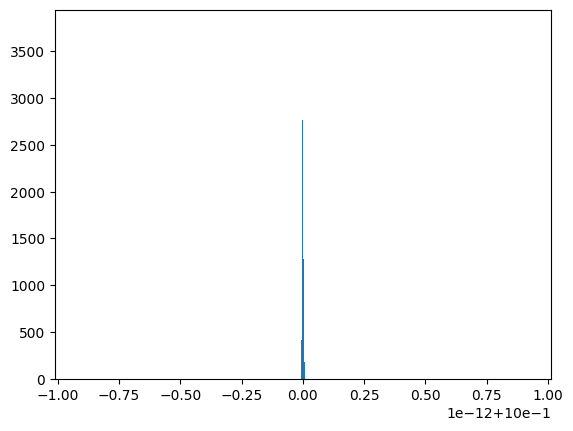

In [5]:
plt.hist(BLs)

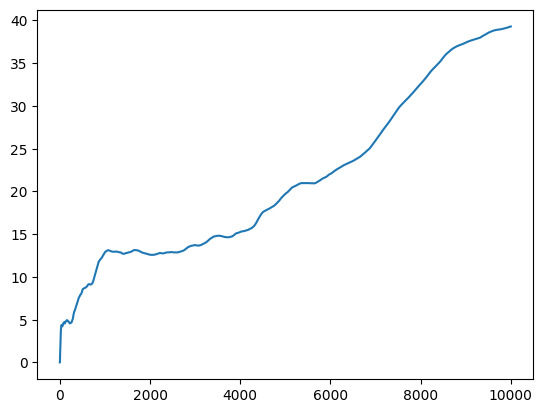

In [36]:
plt.plot(np.arange(STEPS),RGs)

In [19]:
numerator = np.array([np.arange(1,100_000 + 1),np.arange(1,100_000 + 1),np.arange(1,100_000 + 1)]).T

ValueError: operands could not be broadcast together with shapes (100000,3) (100000,) 

# FJC  1

End-to-End Distance: 28.334677677631078
Radius of Gyration: 11.032778035082519
Mean Bond Length: 1.0


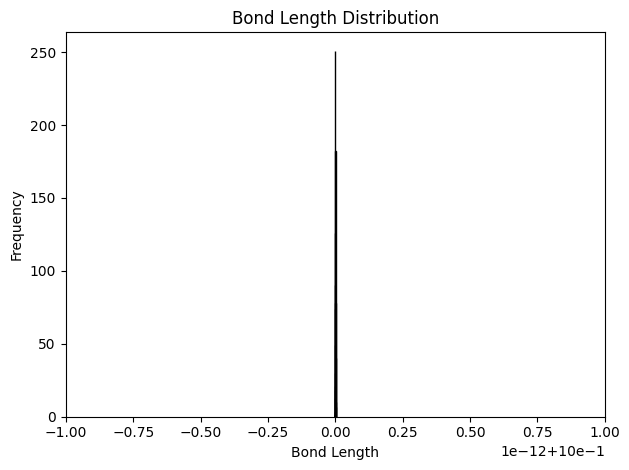

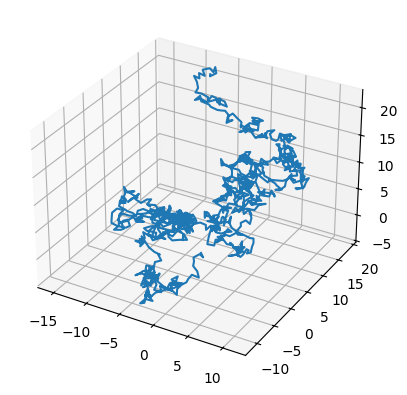

In [21]:
positions = FJC()

# Calculate end-to-end distance
end_to_end_distance = np.linalg.norm(positions[-1] - positions[0])

# Calculate radius of gyration
center_of_mass = np.mean(positions, axis=0)
radius_of_gyration = np.sqrt(np.mean(np.sum((positions - center_of_mass)**2, axis=1)))

# Bond length distribution
bond_lengths = np.linalg.norm(np.diff(positions, axis=0), axis=1)

# Bond angle distribution (not applicable in FJC model)

# Output the results
print(f"End-to-End Distance: {end_to_end_distance}")
print(f"Radius of Gyration: {radius_of_gyration}")
print(f"Mean Bond Length: {np.mean(bond_lengths)}")


plt.hist(bond_lengths, bins=30, edgecolor='black')
plt.xlabel('Bond Length')
plt.ylabel('Frequency')
plt.title('Bond Length Distribution')

plt.tight_layout()
plt.show()


ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs = positions[:,0],ys = positions[:,1] , zs=positions[:,2])
# ax.view_init(0,0)


# Self-Avoiding Walk (SAW) Simulation 2

End-to-End Distance: 36.069377593742864
Radius of Gyration: 12.257377044049841
Mean Bond Length: 1.0
Mean Bond Angle: 1.237120153167123


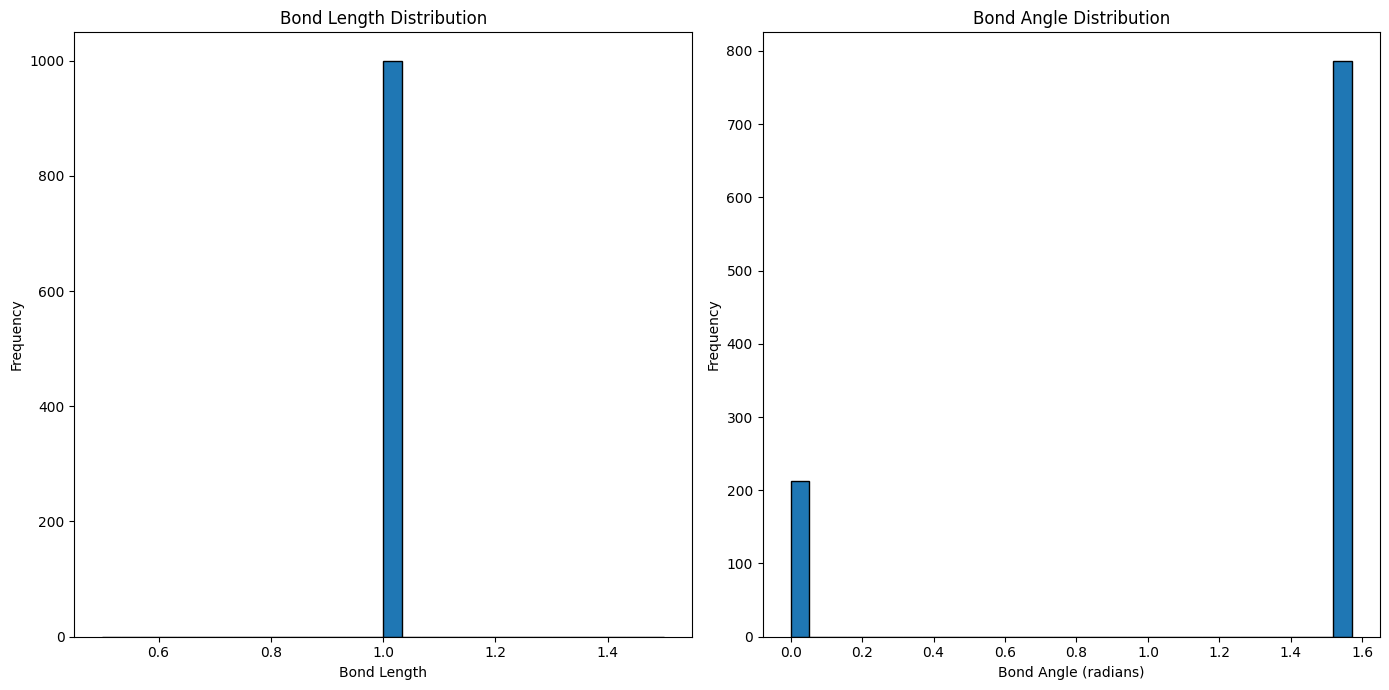

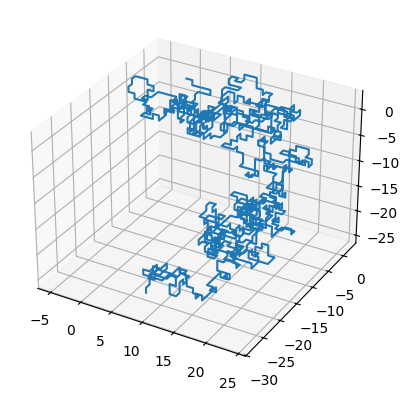

In [3]:
positions = SAW()
# Calculate end-to-end distance
end_to_end_distance = np.linalg.norm(positions[-1] - positions[0])

# Calculate radius of gyration
center_of_mass = np.mean(positions, axis=0)
radius_of_gyration = np.sqrt(np.mean(np.sum((positions - center_of_mass)**2, axis=1)))

# Bond length distribution
bond_lengths = np.linalg.norm(np.diff(positions, axis=0), axis=1)

# Bond angle distribution
bond_vectors = np.diff(positions, axis=0)
normed_bond_vectors = bond_vectors / np.linalg.norm(bond_vectors, axis=1)[:, np.newaxis]
cos_theta = np.einsum('ij,ij->i', normed_bond_vectors[:-1], normed_bond_vectors[1:])
bond_angles = np.arccos(np.clip(cos_theta, -1.0, 1.0))

# Output the results
print(f"End-to-End Distance: {end_to_end_distance}")
print(f"Radius of Gyration: {radius_of_gyration}")
print(f"Mean Bond Length: {np.mean(bond_lengths)}")
print(f"Mean Bond Angle: {np.mean(bond_angles)}")

# Plotting results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(bond_lengths, bins=30, edgecolor='black')
plt.xlabel('Bond Length')
plt.ylabel('Frequency')
plt.title('Bond Length Distribution')

plt.subplot(1, 2, 2)
plt.hist(bond_angles, bins=30, edgecolor='black')
plt.xlabel('Bond Angle (radians)')
plt.ylabel('Frequency')
plt.title('Bond Angle Distribution')

plt.tight_layout()
plt.show()





ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs = positions[:,0],ys = positions[:,1] , zs=positions[:,2])
# ax.view_init(0,0)

# Molecular Dynamics (MD) Simulation for Polymer Chain 3

End-to-End Distance: 48.51417065575722
Radius of Gyration: 21.285657656905176
Mean Bond Length: 1.2683063095711757


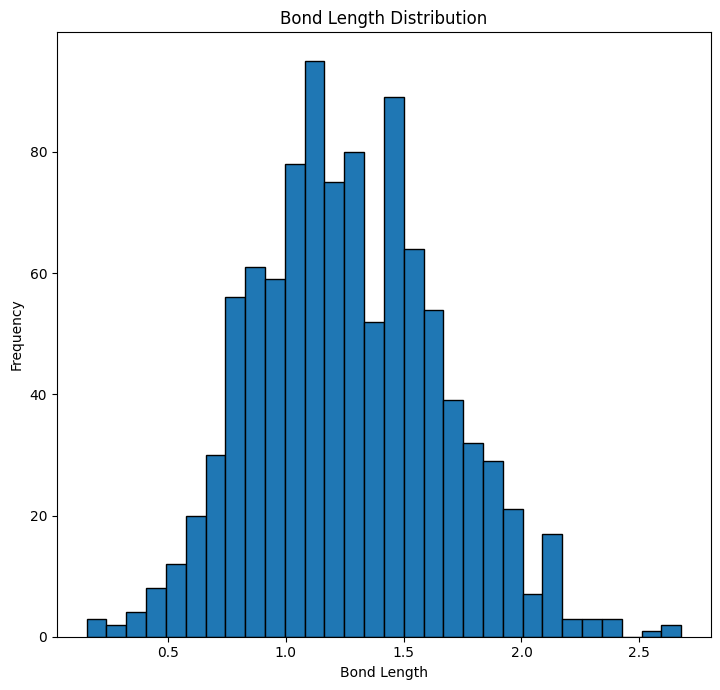

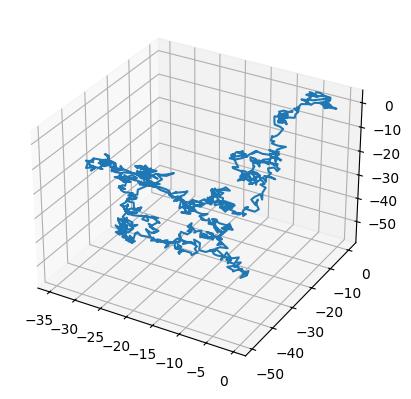

In [4]:
positions = MDC()
# Calculate end-to-end distance
end_to_end_distance = np.linalg.norm(positions[-1] - positions[0])

# Calculate radius of gyration
center_of_mass = np.mean(positions, axis=0)
radius_of_gyration = np.sqrt(np.mean(np.sum((positions - center_of_mass)**2, axis=1)))

# Bond length distribution
bond_lengths = np.linalg.norm(np.diff(positions, axis=0), axis=1)

# Bond angle distribution (not calculated in this basic example)

# Output the results
print(f"End-to-End Distance: {end_to_end_distance}")
print(f"Radius of Gyration: {radius_of_gyration}")
print(f"Mean Bond Length: {np.mean(bond_lengths)}")

# Plotting results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(bond_lengths, bins=30, edgecolor='black')
plt.xlabel('Bond Length')
plt.ylabel('Frequency')
plt.title('Bond Length Distribution')

plt.tight_layout()
plt.show()



ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs = positions[:,0],ys = positions[:,1] , zs=positions[:,2])
# ax.view_init(0,0)

# Brownian Dynamics Simulation 4

End-to-End Distance: 58.78100070647084
Radius of Gyration: 31.78746323898458
Mean Bond Length: 1.012052493835139
Mean Bond Angle: 1.014591951529571


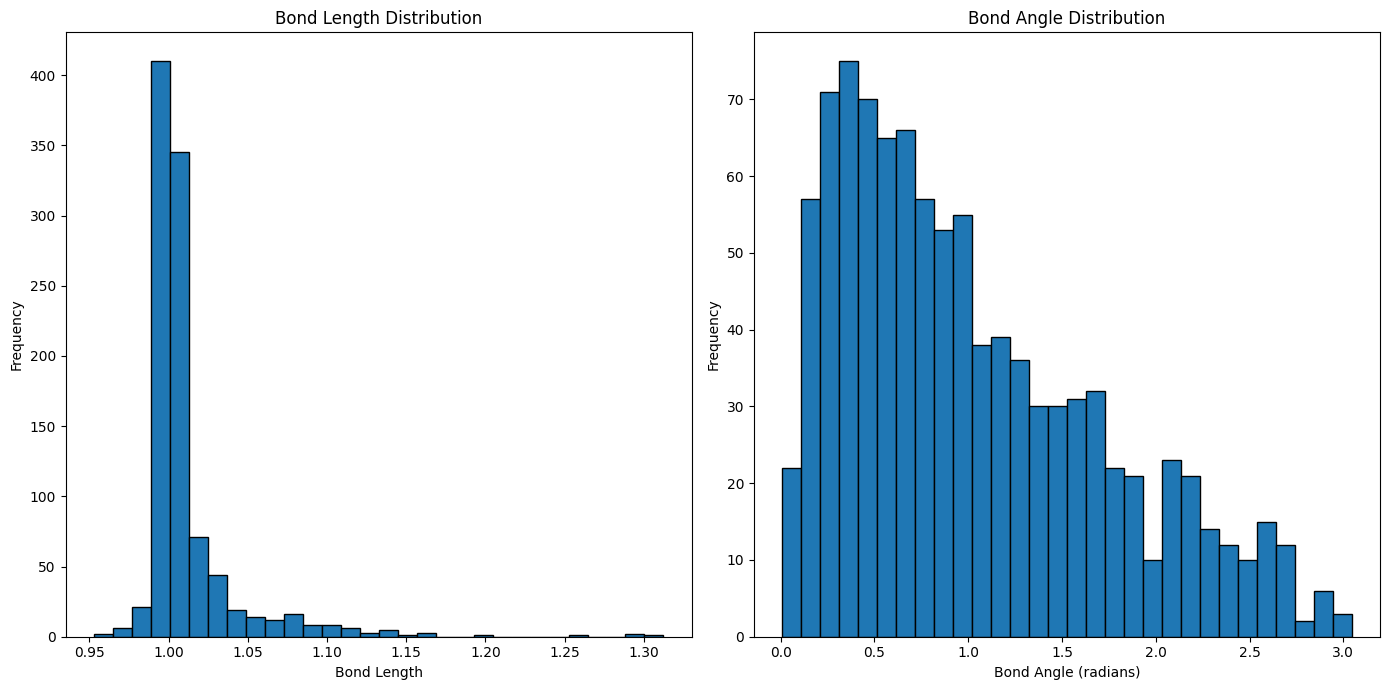

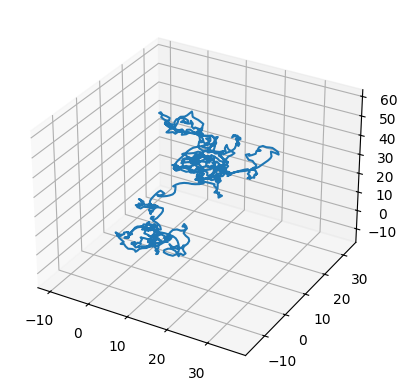

In [5]:
positions =- BROWNIAN()
# Calculate end-to-end distance
end_to_end_distance = np.linalg.norm(positions[-1] - positions[0])

# Calculate radius of gyration
center_of_mass = np.mean(positions, axis=0)
radius_of_gyration = np.sqrt(np.mean(np.sum((positions - center_of_mass)**2, axis=1)))

# Bond length distribution
bond_lengths = np.linalg.norm(np.diff(positions, axis=0), axis=1)

# Bond angle distribution
bond_vectors = np.diff(positions, axis=0)
normed_bond_vectors = bond_vectors / np.linalg.norm(bond_vectors, axis=1)[:, np.newaxis]
cos_theta = np.einsum('ij,ij->i', normed_bond_vectors[:-1], normed_bond_vectors[1:])
bond_angles = np.arccos(np.clip(cos_theta, -1.0, 1.0))

# Output the results
print(f"End-to-End Distance: {end_to_end_distance}")
print(f"Radius of Gyration: {radius_of_gyration}")
print(f"Mean Bond Length: {np.mean(bond_lengths)}")
print(f"Mean Bond Angle: {np.mean(bond_angles)}")

# Plotting results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(bond_lengths, bins=30, edgecolor='black')
plt.xlabel('Bond Length')
plt.ylabel('Frequency')
plt.title('Bond Length Distribution')

plt.subplot(1, 2, 2)
plt.hist(bond_angles, bins=30, edgecolor='black')
plt.xlabel('Bond Angle (radians)')
plt.ylabel('Frequency')
plt.title('Bond Angle Distribution')

plt.tight_layout()
plt.show()



ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs = positions[:,0],ys = positions[:,1] , zs=positions[:,2])
# ax.view_init(0,0)


# Gaussian Chain model 5

End-to-End Distance: 17.457124322235604
Radius of Gyration: 8.902192195458655
Mean Bond Length: 1.000293651949947
Mean Bond Angle: 1.5596271382846594


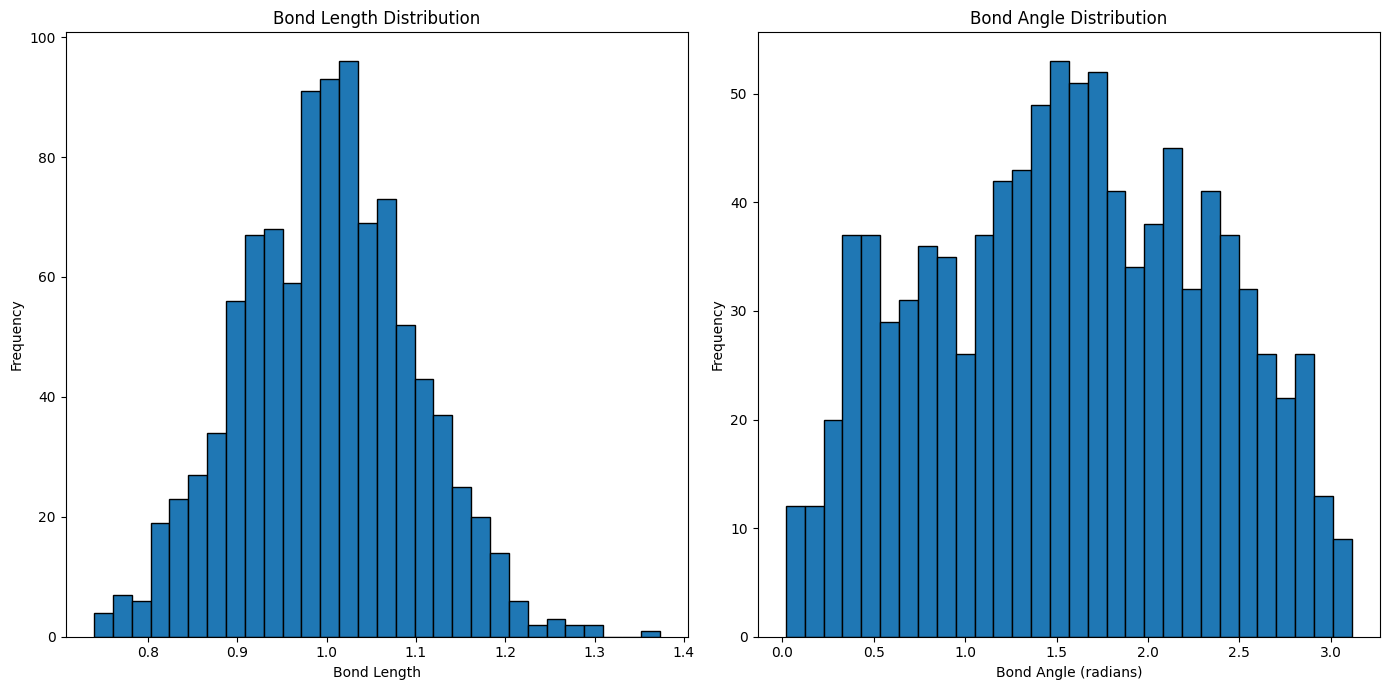

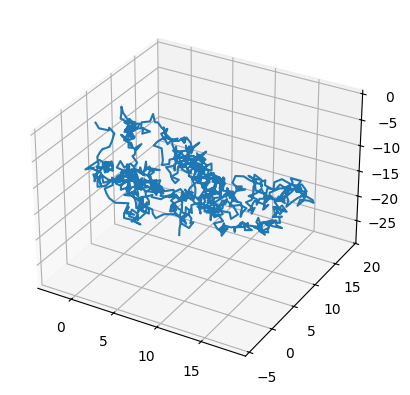

In [6]:
positions = GAUSSIAN()
# Calculate end-to-end distance
end_to_end_distance = np.linalg.norm(positions[-1] - positions[0])

# Calculate radius of gyration
center_of_mass = np.mean(positions, axis=0)
radius_of_gyration = np.sqrt(np.mean(np.sum((positions - center_of_mass)**2, axis=1)))

# Bond length distribution
calculated_bond_lengths = np.linalg.norm(np.diff(positions, axis=0), axis=1)

# Bond angle distribution
bond_vectors = np.diff(positions, axis=0)
normed_bond_vectors = bond_vectors / np.linalg.norm(bond_vectors, axis=1)[:, np.newaxis]
cos_theta = np.einsum('ij,ij->i', normed_bond_vectors[:-1], normed_bond_vectors[1:])
bond_angles = np.arccos(cos_theta)

# Output the results
print(f"End-to-End Distance: {end_to_end_distance}")
print(f"Radius of Gyration: {radius_of_gyration}")
print(f"Mean Bond Length: {np.mean(calculated_bond_lengths)}")
print(f"Mean Bond Angle: {np.mean(bond_angles)}")

# Plotting results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(calculated_bond_lengths, bins=30, edgecolor='black')
plt.xlabel('Bond Length')
plt.ylabel('Frequency')
plt.title('Bond Length Distribution')

plt.subplot(1, 2, 2)
plt.hist(bond_angles, bins=30, edgecolor='black')
plt.xlabel('Bond Angle (radians)')
plt.ylabel('Frequency')
plt.title('Bond Angle Distribution')

plt.tight_layout()
plt.show()


ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs = positions[:,0],ys = positions[:,1] , zs=positions[:,2])
# ax.view_init(0,0)

# Rotational Isomeric State (RIS) Simulation 6

End-to-End Distance: 40.858715373070716
Radius of Gyration: 15.21892502326137
Mean Bond Length: 1.0
Mean Dihedral Angle: 1.547758593746469


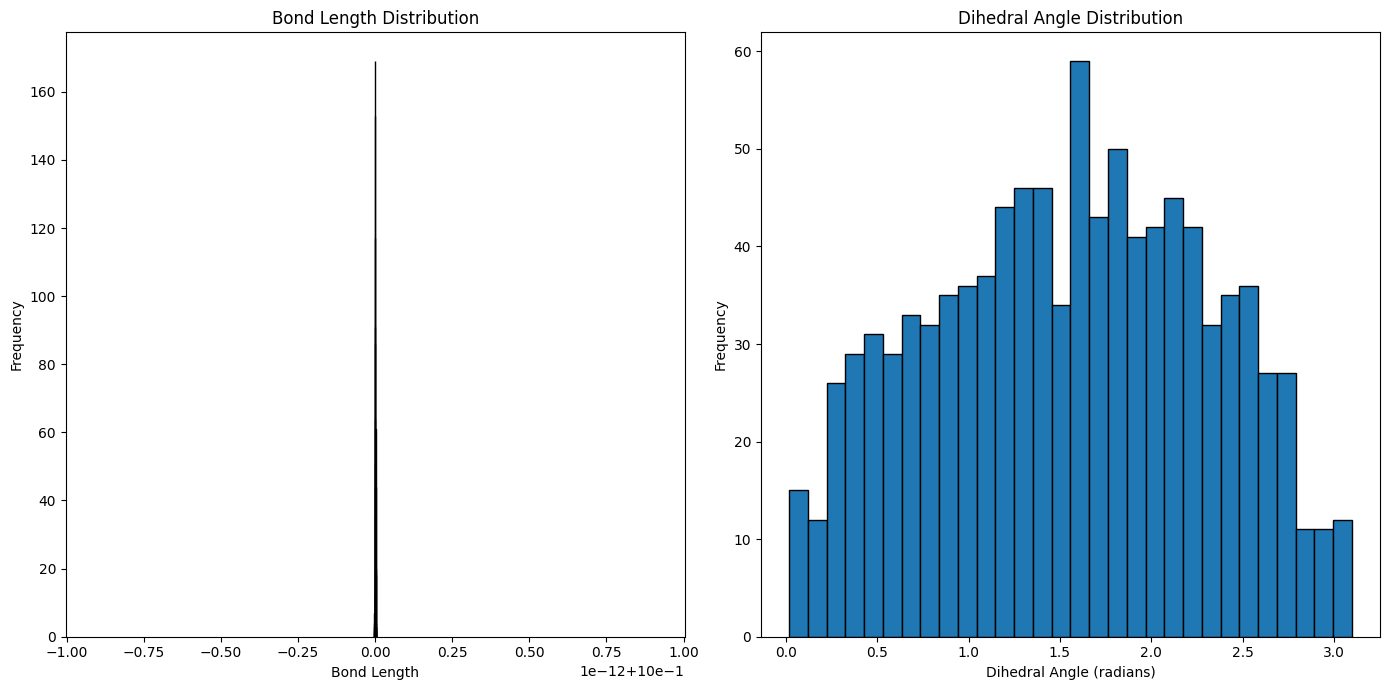

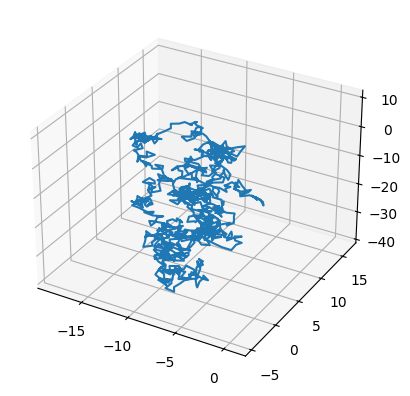

In [7]:
positions = RIS()
# Calculate end-to-end distance
end_to_end_distance = np.linalg.norm(positions[-1] - positions[0])

# Calculate radius of gyration
center_of_mass = np.mean(positions, axis=0)
radius_of_gyration = np.sqrt(np.mean(np.sum((positions - center_of_mass)**2, axis=1)))

# Bond length distribution
bond_lengths = np.linalg.norm(np.diff(positions, axis=0), axis=1)

# Dihedral angle distribution
bond_vectors = np.diff(positions, axis=0)
normed_bond_vectors = bond_vectors / np.linalg.norm(bond_vectors, axis=1)[:, np.newaxis]
cos_phi = np.einsum('ij,ij->i', normed_bond_vectors[:-1], normed_bond_vectors[1:])
dihedral_angles_obtained = np.arccos(np.clip(cos_phi, -1.0, 1.0))

# Output the results
print(f"End-to-End Distance: {end_to_end_distance}")
print(f"Radius of Gyration: {radius_of_gyration}")
print(f"Mean Bond Length: {np.mean(bond_lengths)}")
print(f"Mean Dihedral Angle: {np.mean(dihedral_angles_obtained)}")

# Plotting results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(bond_lengths, bins=30, edgecolor='black')
plt.xlabel('Bond Length')
plt.ylabel('Frequency')
plt.title('Bond Length Distribution')

plt.subplot(1, 2, 2)
plt.hist(dihedral_angles_obtained, bins=30, edgecolor='black')
plt.xlabel('Dihedral Angle (radians)')
plt.ylabel('Frequency')
plt.title('Dihedral Angle Distribution')

plt.tight_layout()
plt.show()



ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs = positions[:,0],ys = positions[:,1] , zs=positions[:,2])
# ax.view_init(0,0)


# Freely Rotating Chain (FRC) model 7

End-to-End Distance: 26.64015732127834
Radius of Gyration: 15.38959786504648
Mean Bond Length: 1.0
Mean Bond Angle: 1.371313264852606


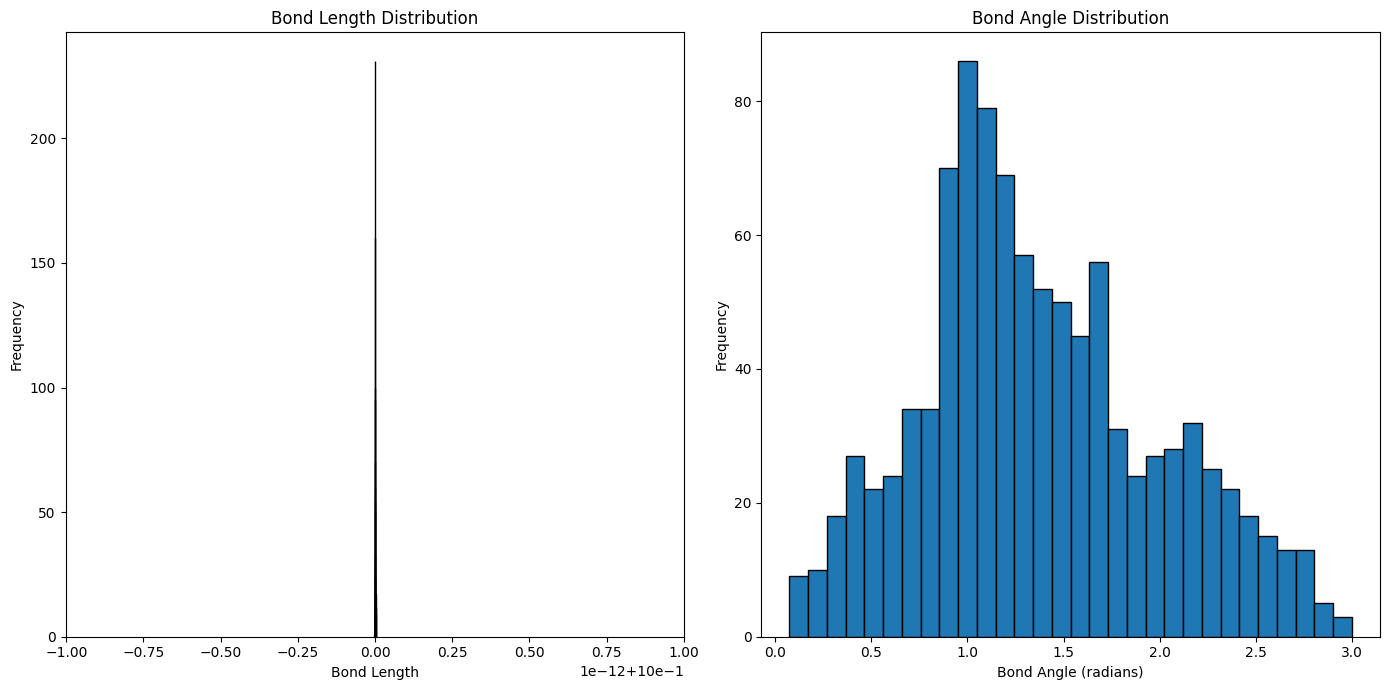

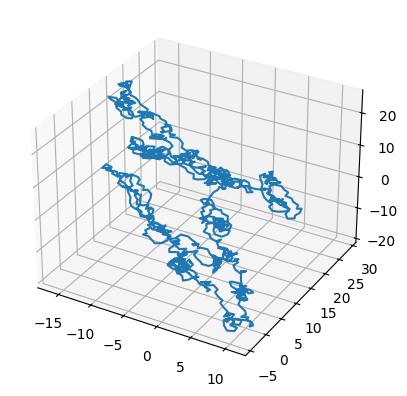

In [8]:
positions = FRC()
# Calculate end-to-end distance
end_to_end_distance = np.linalg.norm(positions[-1] - positions[0])

# Calculate radius of gyration
center_of_mass = np.mean(positions, axis=0)
radius_of_gyration = np.sqrt(np.mean(np.sum((positions - center_of_mass)**2, axis=1)))

# Bond length distribution
bond_lengths = np.linalg.norm(np.diff(positions, axis=0), axis=1)

# Bond angle distribution
bond_vectors = np.diff(positions, axis=0)
normed_bond_vectors = bond_vectors / np.linalg.norm(bond_vectors, axis=1)[:, np.newaxis]
cos_theta = np.einsum('ij,ij->i', normed_bond_vectors[:-1], normed_bond_vectors[1:])
bond_angles = np.arccos(cos_theta)

# Output the results
print(f"End-to-End Distance: {end_to_end_distance}")
print(f"Radius of Gyration: {radius_of_gyration}")
print(f"Mean Bond Length: {np.mean(bond_lengths)}")
print(f"Mean Bond Angle: {np.mean(bond_angles)}")

# Plotting results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(bond_lengths, bins=30, edgecolor='black')
plt.xlabel('Bond Length')
plt.ylabel('Frequency')
plt.title('Bond Length Distribution')

plt.subplot(1, 2, 2)
plt.hist(bond_angles, bins=30, edgecolor='black')
plt.xlabel('Bond Angle (radians)')
plt.ylabel('Frequency')
plt.title('Bond Angle Distribution')

plt.tight_layout()
plt.show()



ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs = positions[:,0],ys = positions[:,1] , zs=positions[:,2])
# ax.view_init(0,0)

# Monte Carlo Lattice Model Simulation 8 

End-to-End Distance: 7.810249675906654
Radius of Gyration: 5.218265995519968
Mean Bond Length: 1.2270946014424495
Mean Bond Angle: 1.3033715761765057


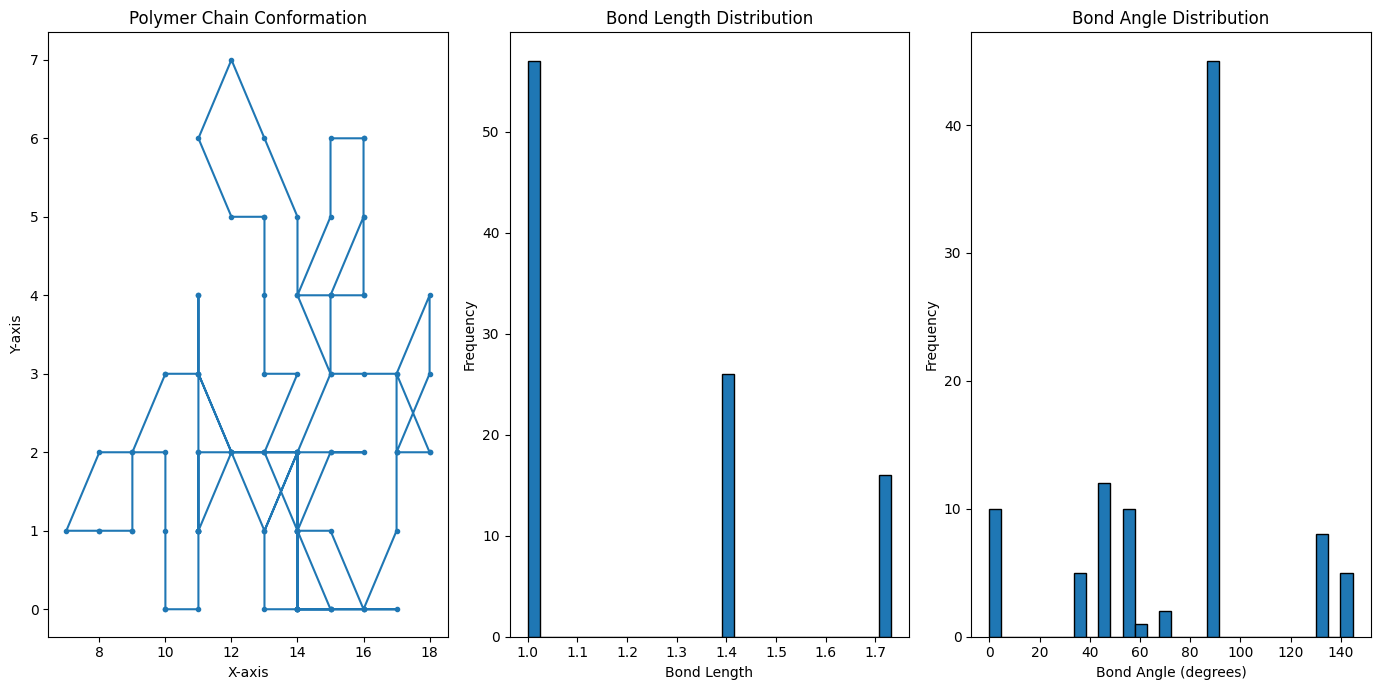

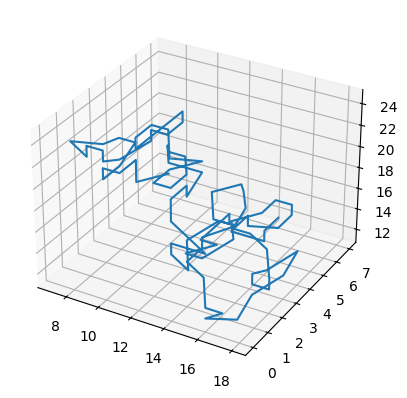

In [9]:
positions = MCL()
# Calculate end-to-end distance
end_to_end_distance = np.linalg.norm(positions[-1] - positions[0])

# Calculate radius of gyration
center_of_mass = np.mean(positions, axis=0)
radius_of_gyration = np.sqrt(np.mean(np.sum((positions - center_of_mass)**2, axis=1)))

# Bond length distribution
bond_lengths = np.linalg.norm(np.diff(positions, axis=0), axis=1)

# Bond angle distribution
def calculate_bond_angles(positions):
    bond_angles = []
    for i in range(1, len(positions) - 1):
        vec1 = positions[i] - positions[i - 1]
        vec2 = positions[i + 1] - positions[i]
        cos_theta = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
        bond_angles.append(np.arccos(cos_theta))
    return np.array(bond_angles)

bond_angles = calculate_bond_angles(positions)

# Output the results
print(f"End-to-End Distance: {end_to_end_distance}")
print(f"Radius of Gyration: {radius_of_gyration}")
print(f"Mean Bond Length: {np.mean(bond_lengths)}")
print(f"Mean Bond Angle: {np.mean(bond_angles)}")

# Plotting results
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.plot(positions[:, 0], positions[:, 1], marker='o', linestyle='-', markersize=3)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Polymer Chain Conformation')

plt.subplot(1, 3, 2)
plt.hist(bond_lengths, bins=30, edgecolor='black')
plt.xlabel('Bond Length')
plt.ylabel('Frequency')
plt.title('Bond Length Distribution')

plt.subplot(1, 3, 3)
plt.hist(np.degrees(bond_angles), bins=30, edgecolor='black')
plt.xlabel('Bond Angle (degrees)')
plt.ylabel('Frequency')
plt.title('Bond Angle Distribution')

plt.tight_layout()
plt.show()


ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs = positions[:,0],ys = positions[:,1] , zs=positions[:,2])
# ax.view_init(0,0)

# Kuhn Length Model Simulation 9 

End-to-End Distance: 12.086578424482417
Radius of Gyration: 5.490742554003501
Mean Bond Length: 1.0
Mean Bond Angle: 1.6129754816075128


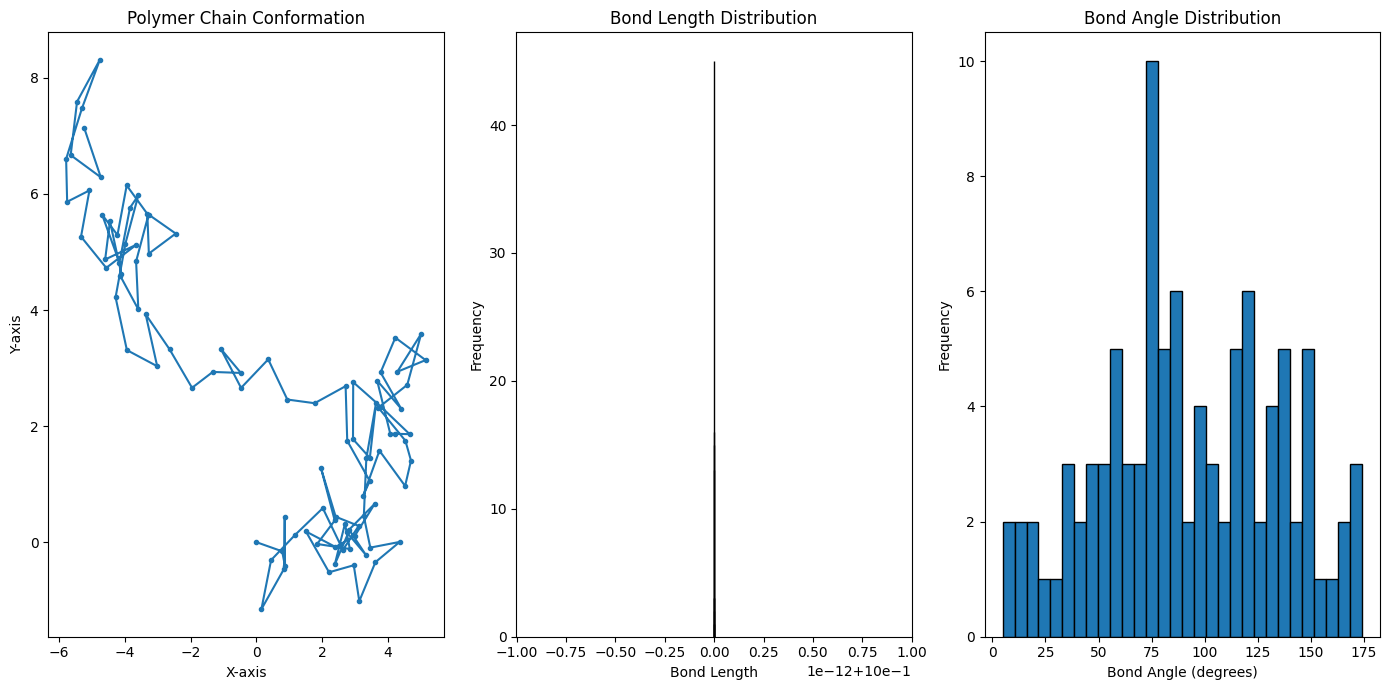

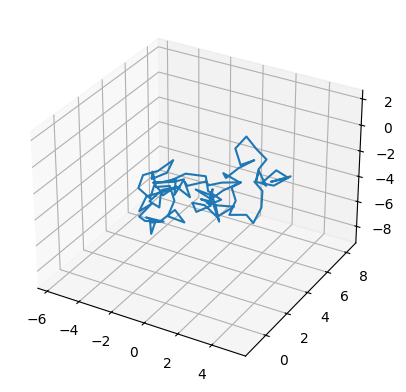

In [10]:
positions = KLM()
# Calculate end-to-end distance
end_to_end_distance = np.linalg.norm(positions[-1] - positions[0])

# Calculate radius of gyration
center_of_mass = np.mean(positions, axis=0)
radius_of_gyration = np.sqrt(np.mean(np.sum((positions - center_of_mass)**2, axis=1)))

# Bond length distribution
bond_lengths = np.linalg.norm(np.diff(positions, axis=0), axis=1)

# Bond angle distribution
def calculate_bond_angles(positions):
    bond_angles = []
    for i in range(1, len(positions) - 1):
        vec1 = positions[i] - positions[i - 1]
        vec2 = positions[i + 1] - positions[i]
        cos_theta = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
        bond_angles.append(np.arccos(cos_theta))
    return np.array(bond_angles)

bond_angles = calculate_bond_angles(positions)

# Output the results
print(f"End-to-End Distance: {end_to_end_distance}")
print(f"Radius of Gyration: {radius_of_gyration}")
print(f"Mean Bond Length: {np.mean(bond_lengths)}")
print(f"Mean Bond Angle: {np.mean(bond_angles)}")

# Plotting results
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.plot(positions[:, 0], positions[:, 1], marker='o', linestyle='-', markersize=3)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Polymer Chain Conformation')

plt.subplot(1, 3, 2)
plt.hist(bond_lengths, bins=30, edgecolor='black')
plt.xlabel('Bond Length')
plt.ylabel('Frequency')
plt.title('Bond Length Distribution')

plt.subplot(1, 3, 3)
plt.hist(np.degrees(bond_angles), bins=30, edgecolor='black')
plt.xlabel('Bond Angle (degrees)')
plt.ylabel('Frequency')
plt.title('Bond Angle Distribution')

plt.tight_layout()
plt.show()


ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs = positions[:,0],ys = positions[:,1] , zs=positions[:,2])
# ax.view_init(0,0)

# Reptation Model Simulation 10

End-to-End Distance: 99.0
Radius of Gyration: 28.5625338371299
Mean Bond Length: 5.209394884602043
Mean Bond Angle: 1.906083299955944


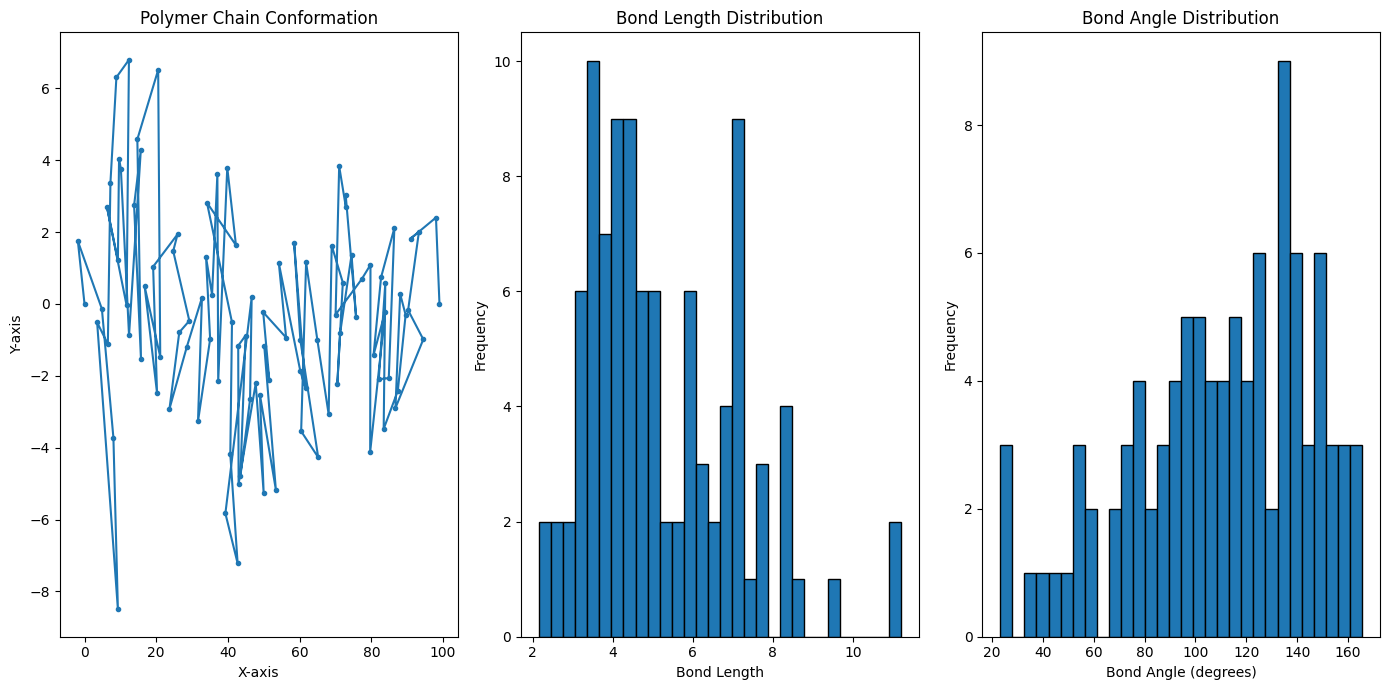

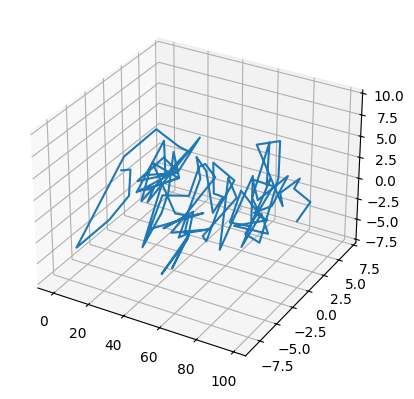

In [11]:
positions = REPTATION()
# Calculate end-to-end distance
end_to_end_distance = np.linalg.norm(positions[-1] - positions[0])

# Calculate radius of gyration
center_of_mass = np.mean(positions, axis=0)
radius_of_gyration = np.sqrt(np.mean(np.sum((positions - center_of_mass)**2, axis=1)))

# Bond length distribution
bond_lengths = np.linalg.norm(np.diff(positions, axis=0), axis=1)

# Bond angle distribution
def calculate_bond_angles(positions):
    bond_angles = []
    for i in range(1, len(positions) - 1):
        vec1 = positions[i] - positions[i - 1]
        vec2 = positions[i + 1] - positions[i]
        cos_theta = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
        bond_angles.append(np.arccos(cos_theta))
    return np.array(bond_angles)

bond_angles = calculate_bond_angles(positions)

# Output the results
print(f"End-to-End Distance: {end_to_end_distance}")
print(f"Radius of Gyration: {radius_of_gyration}")
print(f"Mean Bond Length: {np.mean(bond_lengths)}")
print(f"Mean Bond Angle: {np.mean(bond_angles)}")

# Plotting results
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.plot(positions[:, 0], positions[:, 1], marker='o', linestyle='-', markersize=3)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Polymer Chain Conformation')

plt.subplot(1, 3, 2)
plt.hist(bond_lengths, bins=30, edgecolor='black')
plt.xlabel('Bond Length')
plt.ylabel('Frequency')
plt.title('Bond Length Distribution')

plt.subplot(1, 3, 3)
plt.hist(np.degrees(bond_angles), bins=30, edgecolor='black')
plt.xlabel('Bond Angle (degrees)')
plt.ylabel('Frequency')
plt.title('Bond Angle Distribution')

plt.tight_layout()
plt.show()


ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs = positions[:,0],ys = positions[:,1] , zs=positions[:,2])
# ax.view_init(0,0)

# Worm-Like Chain (WLC) Simulation 11

Mean End-to-End Distance: 98.20253323124993
Standard Deviation of End-to-End Distance: 0.1334668879053909
Mean Radius of Gyration: 28.63944404277928
Standard Deviation of Radius of Gyration: 0.04146054414561553


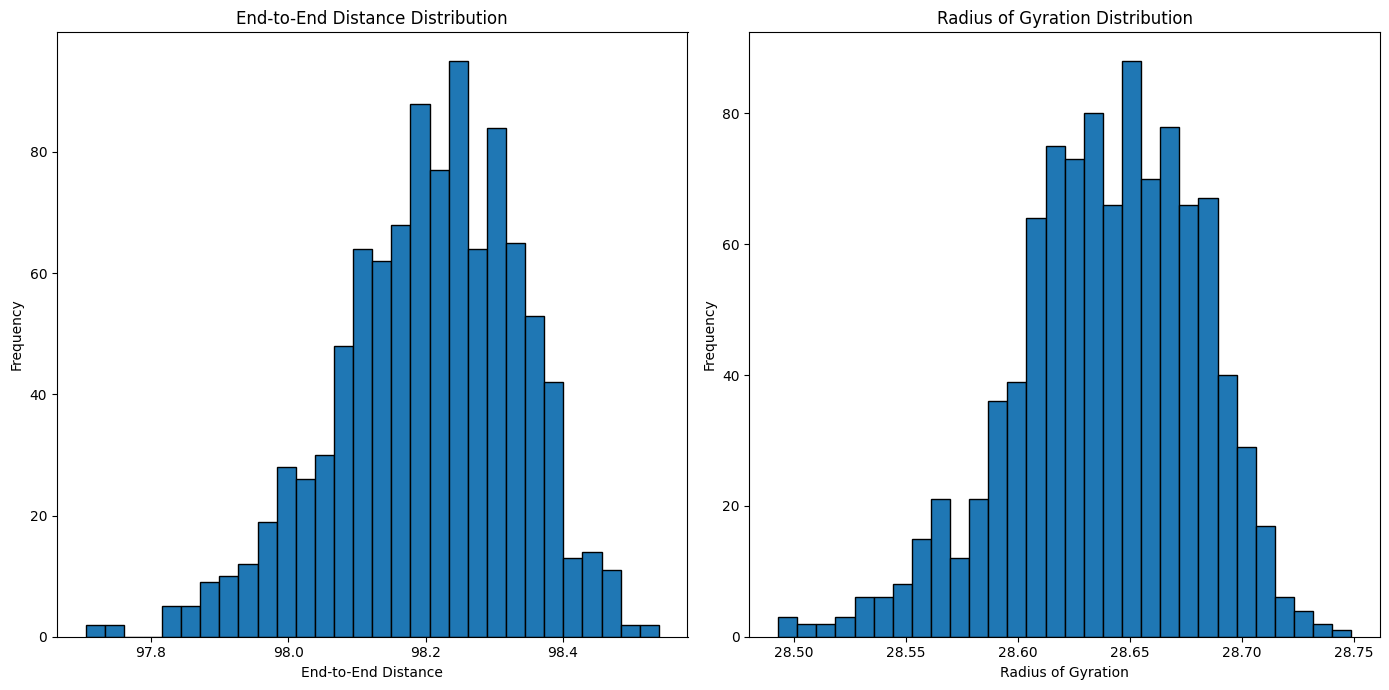

<Figure size 800x800 with 0 Axes>

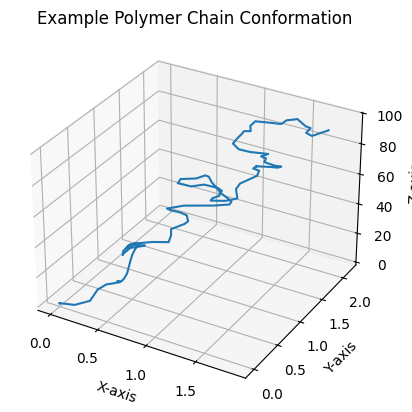

In [12]:
# Parameters
num_segments = 100  # Number of segments (monomers) in the polymer chain
segment_length = 1.0  # Length of each segment (monomer)
persistence_length = 20.0  # Persistence length of the polymer
num_chains = 1000  # Number of polymer chains to simulate

# Simulate multiple polymer chains
chains = np.array([generate_worm_like_chain() for _ in range(num_chains)])

# Calculate end-to-end distances and radii of gyration
end_to_end_distances = np.linalg.norm(chains[:, -1] - chains[:, 0], axis=1)
radii_of_gyration = np.sqrt(np.mean(np.linalg.norm(chains - np.mean(chains, axis=1)[:, None, :], axis=2)**2, axis=1))

# Mean and standard deviation of end-to-end distance and radius of gyration
mean_end_to_end_distance = np.mean(end_to_end_distances)
std_end_to_end_distance = np.std(end_to_end_distances)
mean_radius_of_gyration = np.mean(radii_of_gyration)
std_radius_of_gyration = np.std(radii_of_gyration)

# Output the results
print(f"Mean End-to-End Distance: {mean_end_to_end_distance}")
print(f"Standard Deviation of End-to-End Distance: {std_end_to_end_distance}")
print(f"Mean Radius of Gyration: {mean_radius_of_gyration}")
print(f"Standard Deviation of Radius of Gyration: {std_radius_of_gyration}")

# Plot the end-to-end distance distribution
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(end_to_end_distances, bins=30, edgecolor='black')
plt.xlabel('End-to-End Distance')
plt.ylabel('Frequency')
plt.title('End-to-End Distance Distribution')

# Plot the radius of gyration distribution
plt.subplot(1, 2, 2)
plt.hist(radii_of_gyration, bins=30, edgecolor='black')
plt.xlabel('Radius of Gyration')
plt.ylabel('Frequency')
plt.title('Radius of Gyration Distribution')

plt.tight_layout()
plt.show()

# Plot an example polymer chain
plt.figure(figsize=(8, 8))
example_chain = chains[0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(example_chain[:, 0], example_chain[:, 1], example_chain[:, 2])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Example Polymer Chain Conformation')
plt.show()


# EVC Model Simulation 12

End-to-End Distance: 10.862780491200215
Radius of Gyration: 6.400117186427137
Mean Bond Length: 1.3026961410018392
Mean Bond Angle: 1.4688585005640904


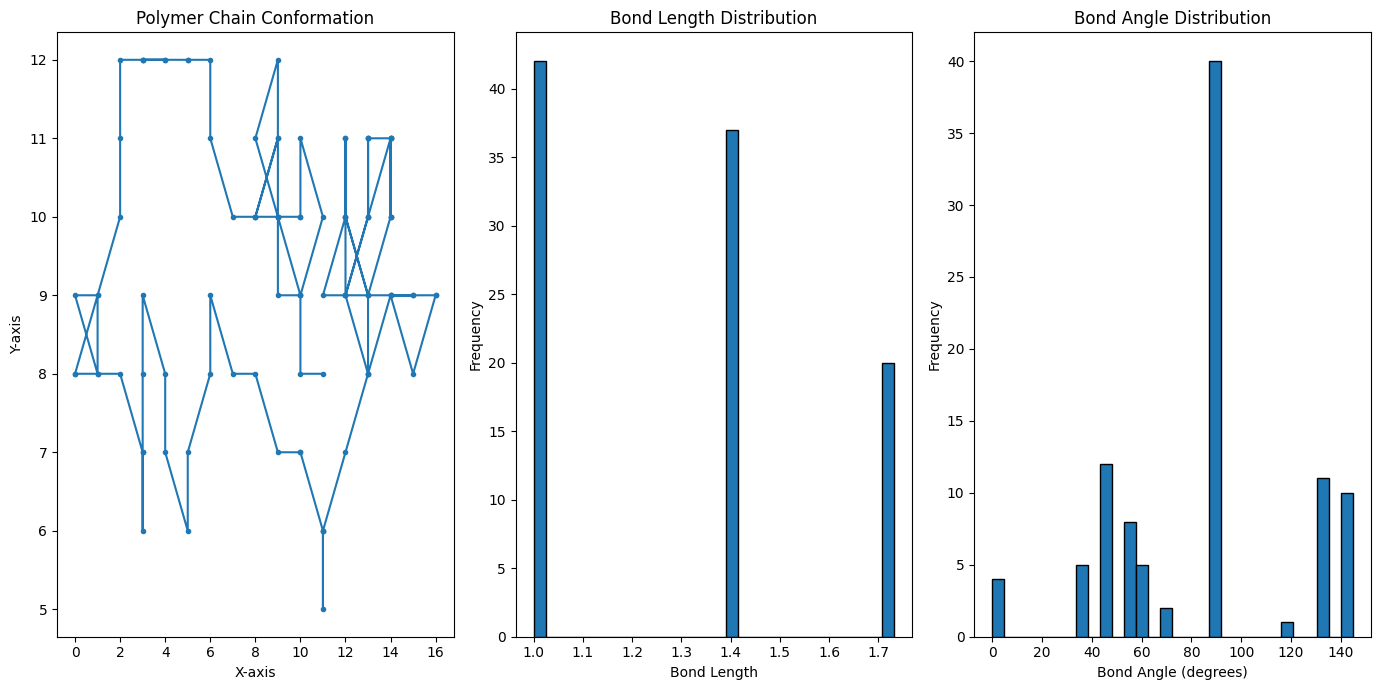

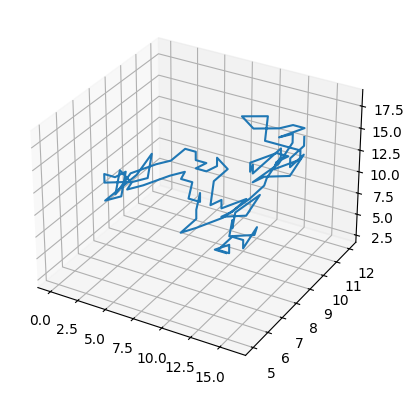

In [13]:
positions = EVC()
# Calculate end-to-end distance
end_to_end_distance = np.linalg.norm(positions[-1] - positions[0])

# Calculate radius of gyration
center_of_mass = np.mean(positions, axis=0)
radius_of_gyration = np.sqrt(np.mean(np.sum((positions - center_of_mass)**2, axis=1)))

# Bond length distribution
bond_lengths = np.linalg.norm(np.diff(positions, axis=0), axis=1)

# Bond angle distribution
def calculate_bond_angles(positions):
    bond_angles = []
    for i in range(1, len(positions) - 1):
        vec1 = positions[i] - positions[i - 1]
        vec2 = positions[i + 1] - positions[i]
        cos_theta = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
        bond_angles.append(np.arccos(cos_theta))
    return np.array(bond_angles)

bond_angles = calculate_bond_angles(positions)

# Output the results
print(f"End-to-End Distance: {end_to_end_distance}")
print(f"Radius of Gyration: {radius_of_gyration}")
print(f"Mean Bond Length: {np.mean(bond_lengths)}")
print(f"Mean Bond Angle: {np.mean(bond_angles)}")

# Plotting results
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.plot(positions[:, 0], positions[:, 1], marker='o', linestyle='-', markersize=3)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Polymer Chain Conformation')

plt.subplot(1, 3, 2)
plt.hist(bond_lengths, bins=30, edgecolor='black')
plt.xlabel('Bond Length')
plt.ylabel('Frequency')
plt.title('Bond Length Distribution')

plt.subplot(1, 3, 3)
plt.hist(np.degrees(bond_angles), bins=30, edgecolor='black')
plt.xlabel('Bond Angle (degrees)')
plt.ylabel('Frequency')
plt.title('Bond Angle Distribution')

plt.tight_layout()
plt.show()

ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs = positions[:,0],ys = positions[:,1] , zs=positions[:,2])
# ax.view_init(0,0)


# Bond fluctuation Chain 13

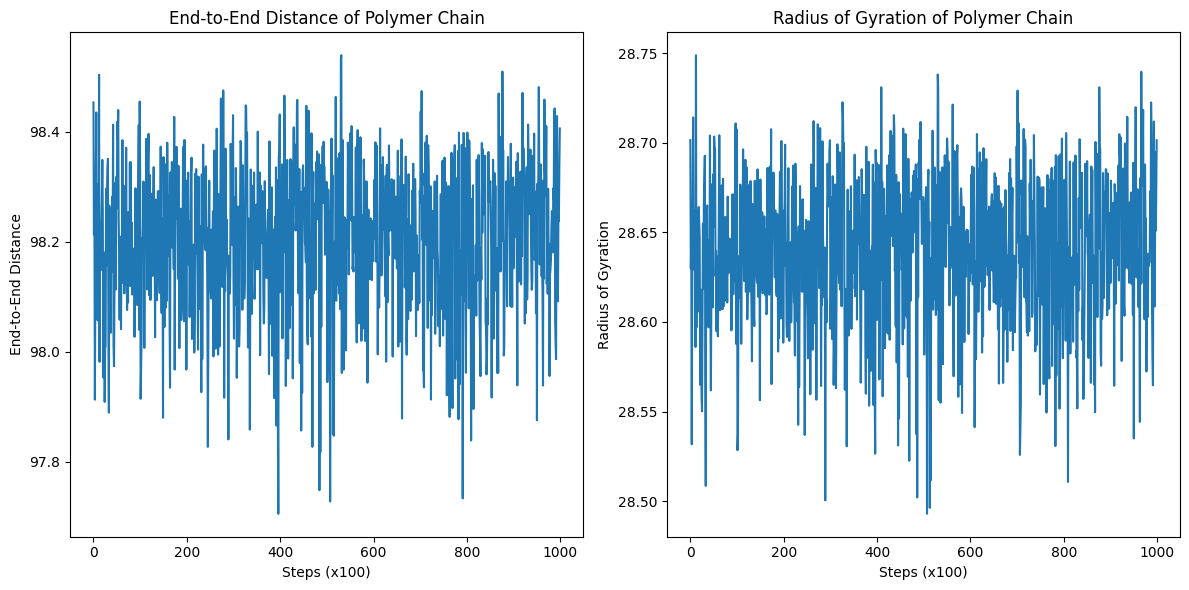

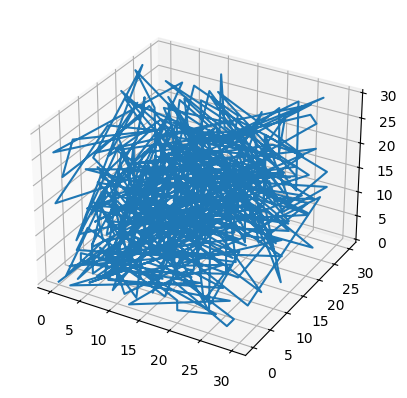

In [14]:
chain = BFC()

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(end_to_end_distances)
plt.xlabel('Steps (x100)')
plt.ylabel('End-to-End Distance')
plt.title('End-to-End Distance of Polymer Chain')

plt.subplot(1, 2, 2)
plt.plot(radii_of_gyration)
plt.xlabel('Steps (x100)')
plt.ylabel('Radius of Gyration')
plt.title('Radius of Gyration of Polymer Chain')

plt.tight_layout()
plt.show()

ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs = chain[:,0],ys = chain[:,1] , zs=chain[:,2])
# ax.view_init(0,0)

In [ ]:
*** BFC,MCL

In [4]:
len(models)

13

In [4]:
models = [FJC,SAW,MDC,BROWNIAN,GAUSSIAN,RIS,FRC,KLM,REPTATION,WLC,EVC]
models_name = ["FJC","SAW","MDC","BROWNIAN","GAUSSIAN","RIS","FRC","KLM","REPTATION","WLC","EVC"]

In [4]:
for m in range(len(models)):
    print(models_name[m])
    e2e,rgs,bs = getData(models[m],1_000,1_000)
    np.save(models_name[m] +"_meanEndToEnds" ,e2e)
    np.save(models_name[m] +"_meanR_G" ,rgs)
    np.save(models_name[m] +"_BondLength" ,bs)

FJC
0


KeyboardInterrupt: 

In [18]:
# e2e,rgs,bs = getData(FJC,1000,1)
# np.save("FJC" +"_meanEndToEnds" ,e2e)
# np.save("FJC" +"_meanR_G" ,rgs)
# np.save("FJC" +"_BondLength" ,bs)

In [11]:
for m in range(len(models)):
    print(models_name[m] +"_meanEndToEnds"+ "= np.load(\"" + models_name[m] +"_meanEndToEnds"+ ".npy\")")
    print(models_name[m] +"_meanR_G" + "= np.load(\"" + models_name[m] +"_meanR_G"+ ".npy\")")
    print(models_name[m] +"_BondLength" + "= np.load(\"" + models_name[m] +"_BondLength"+ ".npy\")")

FJC_meanEndToEnds= np.load("FJC_meanEndToEnds.npy")
FJC_meanR_G= np.load("FJC_meanR_G.npy")
FJC_BondLength= np.load("FJC_BondLength.npy")
SAW_meanEndToEnds= np.load("SAW_meanEndToEnds.npy")
SAW_meanR_G= np.load("SAW_meanR_G.npy")
SAW_BondLength= np.load("SAW_BondLength.npy")
MDC_meanEndToEnds= np.load("MDC_meanEndToEnds.npy")
MDC_meanR_G= np.load("MDC_meanR_G.npy")
MDC_BondLength= np.load("MDC_BondLength.npy")
BROWNIAN_meanEndToEnds= np.load("BROWNIAN_meanEndToEnds.npy")
BROWNIAN_meanR_G= np.load("BROWNIAN_meanR_G.npy")
BROWNIAN_BondLength= np.load("BROWNIAN_BondLength.npy")
GAUSSIAN_meanEndToEnds= np.load("GAUSSIAN_meanEndToEnds.npy")
GAUSSIAN_meanR_G= np.load("GAUSSIAN_meanR_G.npy")
GAUSSIAN_BondLength= np.load("GAUSSIAN_BondLength.npy")
RIS_meanEndToEnds= np.load("RIS_meanEndToEnds.npy")
RIS_meanR_G= np.load("RIS_meanR_G.npy")
RIS_BondLength= np.load("RIS_BondLength.npy")
FRC_meanEndToEnds= np.load("FRC_meanEndToEnds.npy")
FRC_meanR_G= np.load("FRC_meanR_G.npy")
FRC_BondLength= np.l

In [10]:
FJC_meanEndToEnds= np.load("FJC_meanEndToEnds.npy")
FJC_meanR_G= np.load("FJC_meanR_G.npy")
FJC_BondLength= np.load("FJC_BondLength.npy")
SAW_meanEndToEnds= np.load("SAW_meanEndToEnds.npy")
SAW_meanR_G= np.load("SAW_meanR_G.npy")
SAW_BondLength= np.load("SAW_BondLength.npy")
MDC_meanEndToEnds= np.load("MDC_meanEndToEnds.npy")
MDC_meanR_G= np.load("MDC_meanR_G.npy")
MDC_BondLength= np.load("MDC_BondLength.npy")
BROWNIAN_meanEndToEnds= np.load("BROWNIAN_meanEndToEnds.npy")
BROWNIAN_meanR_G= np.load("BROWNIAN_meanR_G.npy")
BROWNIAN_BondLength= np.load("BROWNIAN_BondLength.npy")
GAUSSIAN_meanEndToEnds= np.load("GAUSSIAN_meanEndToEnds.npy")
GAUSSIAN_meanR_G= np.load("GAUSSIAN_meanR_G.npy")
GAUSSIAN_BondLength= np.load("GAUSSIAN_BondLength.npy")
RIS_meanEndToEnds= np.load("RIS_meanEndToEnds.npy")
RIS_meanR_G= np.load("RIS_meanR_G.npy")
RIS_BondLength= np.load("RIS_BondLength.npy")
FRC_meanEndToEnds= np.load("FRC_meanEndToEnds.npy")
FRC_meanR_G= np.load("FRC_meanR_G.npy")
FRC_BondLength= np.load("FRC_BondLength.npy")
MCL_meanEndToEnds= np.load("MCL_meanEndToEnds.npy")
MCL_meanR_G= np.load("MCL_meanR_G.npy")
MCL_BondLength= np.load("MCL_BondLength.npy")
KLM_meanEndToEnds= np.load("KLM_meanEndToEnds.npy")
KLM_meanR_G= np.load("KLM_meanR_G.npy")
KLM_BondLength= np.load("KLM_BondLength.npy")
REPTATION_meanEndToEnds= np.load("REPTATION_meanEndToEnds.npy")
REPTATION_meanR_G= np.load("REPTATION_meanR_G.npy")
REPTATION_BondLength= np.load("REPTATION_BondLength.npy")
WLC_meanEndToEnds= np.load("WLC_meanEndToEnds.npy")
WLC_meanR_G= np.load("WLC_meanR_G.npy")
WLC_BondLength= np.load("WLC_BondLength.npy")
EVC_meanEndToEnds= np.load("EVC_meanEndToEnds.npy")
EVC_meanR_G= np.load("EVC_meanR_G.npy")
EVC_BondLength= np.load("EVC_BondLength.npy")
BFC_meanEndToEnds= np.load("BFC_meanEndToEnds.npy")
BFC_meanR_G= np.load("BFC_meanR_G.npy")
BFC_BondLength= np.load("BFC_BondLength.npy")

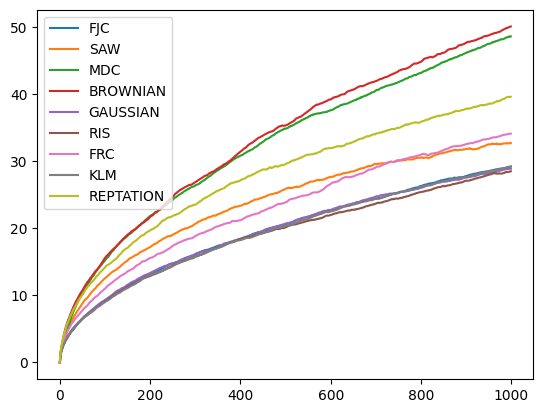

In [27]:
plt.plot(np.arange(1000),FJC_meanEndToEnds)
plt.plot(np.arange(1000),SAW_meanEndToEnds)
plt.plot(np.arange(1000),MDC_meanEndToEnds)
plt.plot(np.arange(1000),BROWNIAN_meanEndToEnds)
plt.plot(np.arange(1000),GAUSSIAN_meanEndToEnds)
plt.plot(np.arange(1000),RIS_meanEndToEnds)
plt.plot(np.arange(1000),FRC_meanEndToEnds)
plt.plot(np.arange(1000),KLM_meanEndToEnds)
plt.plot(np.arange(1000),EVC_meanEndToEnds)

plt.legend(models_name)

plt.savefig("plot1.png")



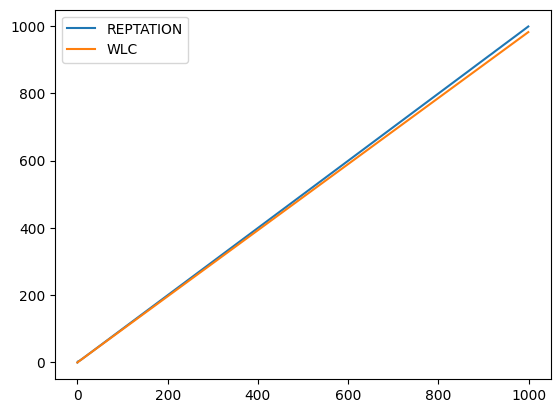

In [28]:
plt.plot(np.arange(1000),REPTATION_meanEndToEnds)
plt.plot(np.arange(1000),WLC_meanEndToEnds)


plt.legend(["REPTATION","WLC"])

plt.savefig("plot2.png")

plt.show()

# <r(t)^2> = 6Dt

In [22]:
models_name

['FJC',
 'SAW',
 'MDC',
 'BROWNIAN',
 'GAUSSIAN',
 'RIS',
 'FRC',
 'KLM',
 'REPTATION',
 'WLC',
 'EVC']

In [24]:
models_name +["REPTATION","WLC"]

['FJC',
 'SAW',
 'MDC',
 'BROWNIAN',
 'GAUSSIAN',
 'RIS',
 'FRC',
 'KLM',
 'REPTATION',
 'WLC',
 'EVC',
 'REPTATION',
 'WLC']

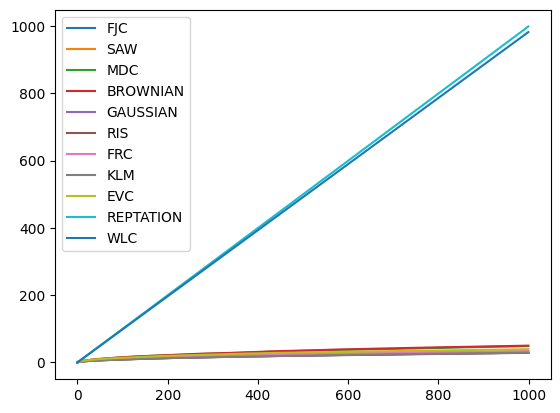

In [30]:
plt.plot(np.arange(1000),FJC_meanEndToEnds)
plt.plot(np.arange(1000),SAW_meanEndToEnds)
plt.plot(np.arange(1000),MDC_meanEndToEnds)
plt.plot(np.arange(1000),BROWNIAN_meanEndToEnds)
plt.plot(np.arange(1000),GAUSSIAN_meanEndToEnds)
plt.plot(np.arange(1000),RIS_meanEndToEnds)
plt.plot(np.arange(1000),FRC_meanEndToEnds)
plt.plot(np.arange(1000),KLM_meanEndToEnds)
plt.plot(np.arange(1000),EVC_meanEndToEnds)

plt.plot(np.arange(1000),REPTATION_meanEndToEnds)
plt.plot(np.arange(1000),WLC_meanEndToEnds)



plt.legend(['FJC',
 'SAW',
 'MDC',
 'BROWNIAN',
 'GAUSSIAN',
 'RIS',
 'FRC',
 'KLM',
 'EVC',
 'REPTATION',
 'WLC'])


plt.savefig("plot3.png")

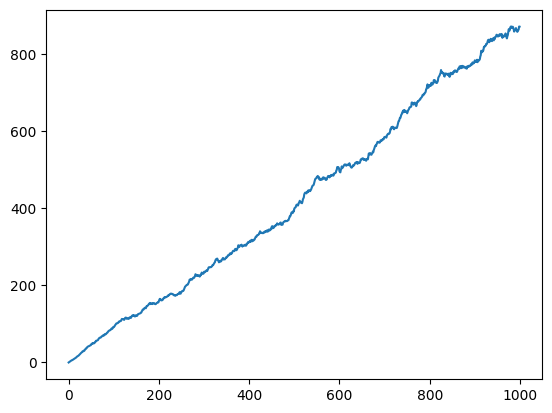

In [47]:
plt.plot(np.arange(1000),FJC_meanEndToEnds**2)

In [7]:
import scipy 

# STAT model 

In [14]:
[scipy.stats.linregress(np.arange(FJC_meanEndToEnds.shape[0]),FJC_meanEndToEnds**2)[0]/6
,scipy.stats.linregress(np.arange(SAW_meanEndToEnds.shape[0]),SAW_meanEndToEnds**2)[0]/6
,scipy.stats.linregress(np.arange(BROWNIAN_meanEndToEnds.shape[0]),BROWNIAN_meanEndToEnds**2)[0]/6
,scipy.stats.linregress(np.arange(MDC_meanEndToEnds.shape[0]),MDC_meanEndToEnds**2)[0]/6
,scipy.stats.linregress(np.arange(GAUSSIAN_meanEndToEnds.shape[0]),GAUSSIAN_meanEndToEnds**2)[0]/6
,scipy.stats.linregress(np.arange(RIS_meanEndToEnds.shape[0]),RIS_meanEndToEnds**2)[0]/6
,scipy.stats.linregress(np.arange(FRC_meanEndToEnds.shape[0]),FRC_meanEndToEnds**2)[0]/6
,scipy.stats.linregress(np.arange(KLM_meanEndToEnds.shape[0]),KLM_meanEndToEnds**2)[0]/6
,scipy.stats.linregress(np.arange(EVC_meanEndToEnds.shape[0]),EVC_meanEndToEnds**2)[0]/6
,scipy.stats.linregress(np.arange(REPTATION_meanEndToEnds.shape[0]),REPTATION_meanEndToEnds**2)[0]/6
,scipy.stats.linregress(np.arange(WLC_meanEndToEnds.shape[0]),WLC_meanEndToEnds**2)[0]/6]

[0.14312390259994612,
 0.17883859372831498,
 0.4239617589329525,
 0.393815375408093,
 0.1405865152718395,
 0.13411929845926165,
 0.19653589252854622,
 0.14308707201943097,
 0.25463692997704307,
 166.4570846905195,
 160.97273897495364]

# fit line and slope -> diff coef 

In [15]:
for name in models_name:
    print("plt.plot(np.arange(1000),"+ name + "_meanEndToEnds)")

plt.plot(np.arange(1000),FJC_meanEndToEnds)
plt.plot(np.arange(1000),SAW_meanEndToEnds)
plt.plot(np.arange(1000),MDC_meanEndToEnds)
plt.plot(np.arange(1000),BROWNIAN_meanEndToEnds)
plt.plot(np.arange(1000),GAUSSIAN_meanEndToEnds)
plt.plot(np.arange(1000),RIS_meanEndToEnds)
plt.plot(np.arange(1000),FRC_meanEndToEnds)
plt.plot(np.arange(1000),KLM_meanEndToEnds)
plt.plot(np.arange(1000),REPTATION_meanEndToEnds)
plt.plot(np.arange(1000),WLC_meanEndToEnds)
plt.plot(np.arange(1000),EVC_meanEndToEnds)


C:\Users\MSI gf65\AppData\Local\Temp\ipykernel_11320\2118498283.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.arange(1000)),np.log(FJC_meanEndToEnds))
C:\Users\MSI gf65\AppData\Local\Temp\ipykernel_11320\2118498283.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.arange(1000)),np.log(SAW_meanEndToEnds))
C:\Users\MSI gf65\AppData\Local\Temp\ipykernel_11320\2118498283.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.arange(1000)),np.log(MDC_meanEndToEnds))
C:\Users\MSI gf65\AppData\Local\Temp\ipykernel_11320\2118498283.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.arange(1000)),np.log(BROWNIAN_meanEndToEnds))
C:\Users\MSI gf65\AppData\Local\Temp\ipykernel_11320\2118498283.py:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.arange(1000)),np.log(GAUSSIAN_meanEndToEnds))
C:\Users\MSI gf65\AppData\Local\Temp\ipykernel_11320\2118498283.py:6: RuntimeWar

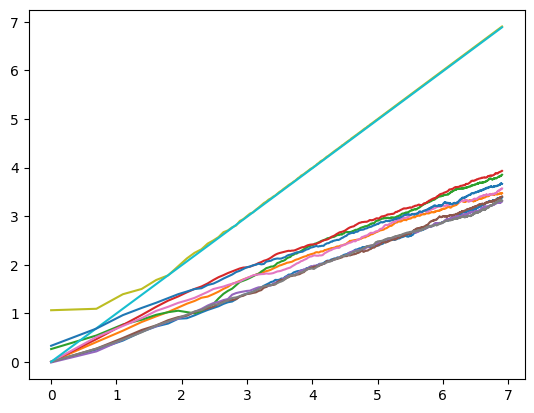

In [37]:
plt.plot(np.log(np.arange(1000)),np.log(FJC_meanEndToEnds))
plt.plot(np.log(np.arange(1000)),np.log(SAW_meanEndToEnds))
plt.plot(np.log(np.arange(1000)),np.log(MDC_meanEndToEnds))
plt.plot(np.log(np.arange(1000)),np.log(BROWNIAN_meanEndToEnds))
plt.plot(np.log(np.arange(1000)),np.log(GAUSSIAN_meanEndToEnds))
plt.plot(np.log(np.arange(1000)),np.log(RIS_meanEndToEnds))
plt.plot(np.log(np.arange(1000)),np.log(FRC_meanEndToEnds))
plt.plot(np.log(np.arange(1000)),np.log(KLM_meanEndToEnds))
plt.plot(np.log(np.arange(1000)),np.log(REPTATION_meanEndToEnds))
plt.plot(np.log(np.arange(1000)),np.log(WLC_meanEndToEnds))
plt.plot(np.log(np.arange(1000)),np.log(EVC_meanEndToEnds))

In [27]:
for name in models_name:
    print("plt.plot(np.arange(1000),"+ name + "_meanR_G)")

plt.plot(np.arange(1000),FJC_meanR_G)
plt.plot(np.arange(1000),SAW_meanR_G)
plt.plot(np.arange(1000),MDC_meanR_G)
plt.plot(np.arange(1000),BROWNIAN_meanR_G)
plt.plot(np.arange(1000),GAUSSIAN_meanR_G)
plt.plot(np.arange(1000),RIS_meanR_G)
plt.plot(np.arange(1000),FRC_meanR_G)
plt.plot(np.arange(1000),KLM_meanR_G)
plt.plot(np.arange(1000),REPTATION_meanR_G)
plt.plot(np.arange(1000),WLC_meanR_G)
plt.plot(np.arange(1000),EVC_meanR_G)


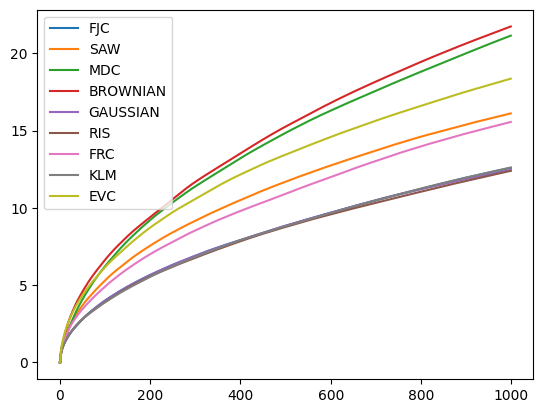

In [32]:
plt.plot(np.arange(1000),FJC_meanR_G)
plt.plot(np.arange(1000),SAW_meanR_G)
plt.plot(np.arange(1000),MDC_meanR_G)
plt.plot(np.arange(1000),BROWNIAN_meanR_G)
plt.plot(np.arange(1000),GAUSSIAN_meanR_G)
plt.plot(np.arange(1000),RIS_meanR_G)
plt.plot(np.arange(1000),FRC_meanR_G)
plt.plot(np.arange(1000),KLM_meanR_G)
plt.plot(np.arange(1000),EVC_meanR_G)


plt.legend(['FJC',
 'SAW',
 'MDC',
 'BROWNIAN',
 'GAUSSIAN',
 'RIS',
 'FRC',
 'KLM',
 'EVC'])


plt.savefig("plot4.png")

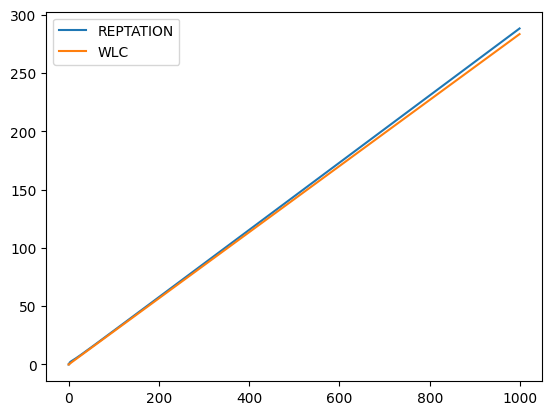

In [33]:
plt.plot(np.arange(1000),REPTATION_meanR_G)
plt.plot(np.arange(1000),WLC_meanR_G)


plt.legend(["REPTATION","WLC"])


plt.savefig("plot5.png")

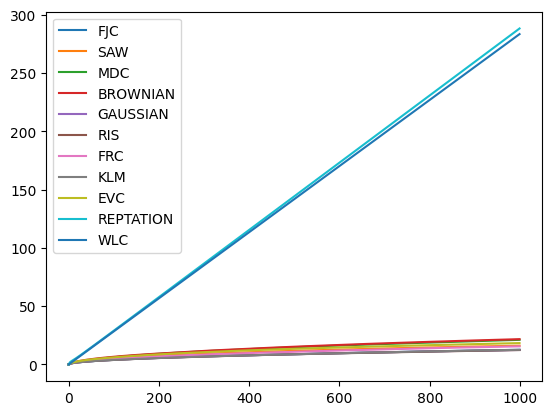

In [34]:
plt.plot(np.arange(1000),FJC_meanR_G)
plt.plot(np.arange(1000),SAW_meanR_G)
plt.plot(np.arange(1000),MDC_meanR_G)
plt.plot(np.arange(1000),BROWNIAN_meanR_G)
plt.plot(np.arange(1000),GAUSSIAN_meanR_G)
plt.plot(np.arange(1000),RIS_meanR_G)
plt.plot(np.arange(1000),FRC_meanR_G)
plt.plot(np.arange(1000),KLM_meanR_G)
plt.plot(np.arange(1000),EVC_meanR_G)


plt.plot(np.arange(1000),REPTATION_meanR_G)
plt.plot(np.arange(1000),WLC_meanR_G)

plt.legend(['FJC',
 'SAW',
 'MDC',
 'BROWNIAN',
 'GAUSSIAN',
 'RIS',
 'FRC',
 'KLM',
 'EVC',"REPTATION","WLC"])





plt.savefig("plot6.png")

In [18]:
len(models)

11

In [40]:
for name in models_name:
    print("plt.hist("+name + "_BondLength)")
    print("plt.show()")

plt.hist(FJC_BondLength)
plt.show()
plt.hist(SAW_BondLength)
plt.show()
plt.hist(MDC_BondLength)
plt.show()
plt.hist(BROWNIAN_BondLength)
plt.show()
plt.hist(GAUSSIAN_BondLength)
plt.show()
plt.hist(RIS_BondLength)
plt.show()
plt.hist(FRC_BondLength)
plt.show()
plt.hist(KLM_BondLength)
plt.show()
plt.hist(REPTATION_BondLength)
plt.show()
plt.hist(WLC_BondLength)
plt.show()
plt.hist(EVC_BondLength)
plt.show()


In [44]:
FJC_BondLength

array([1., 1., 1., ..., 1., 1., 1.])

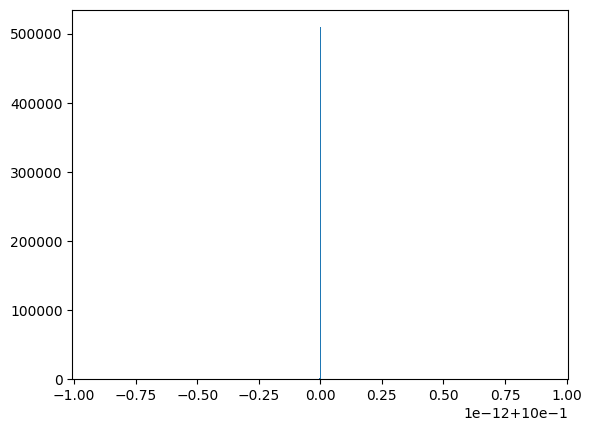

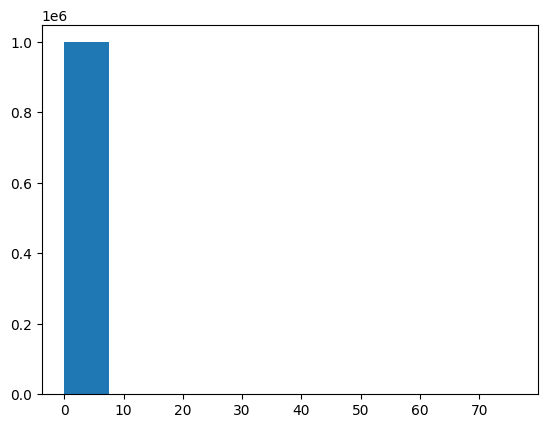

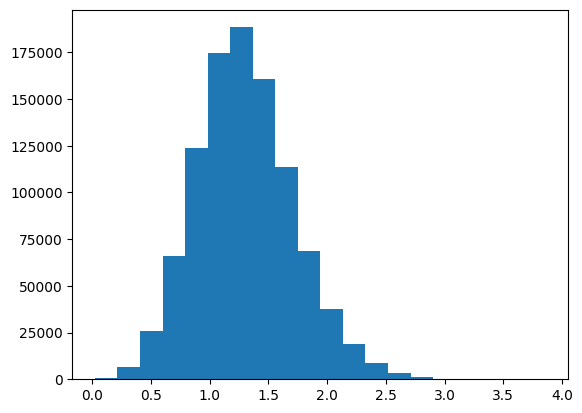

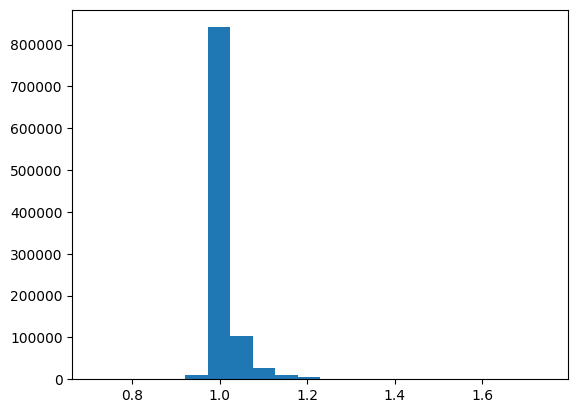

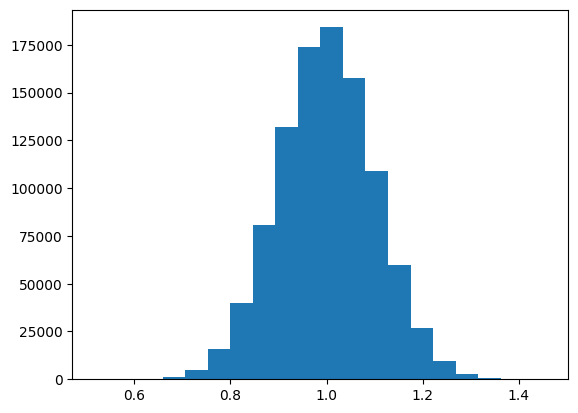

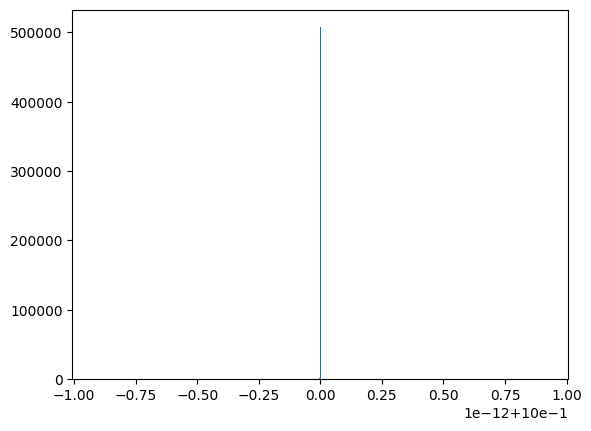

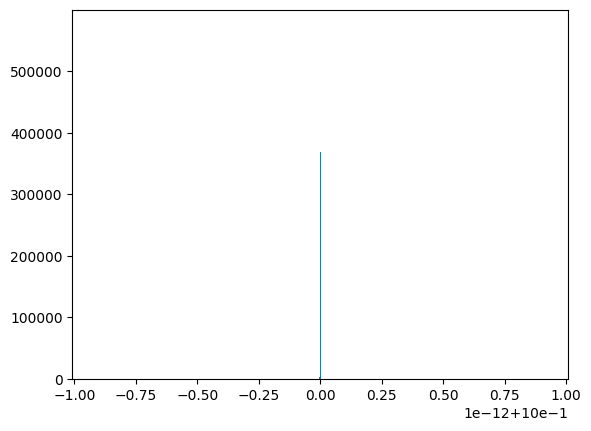

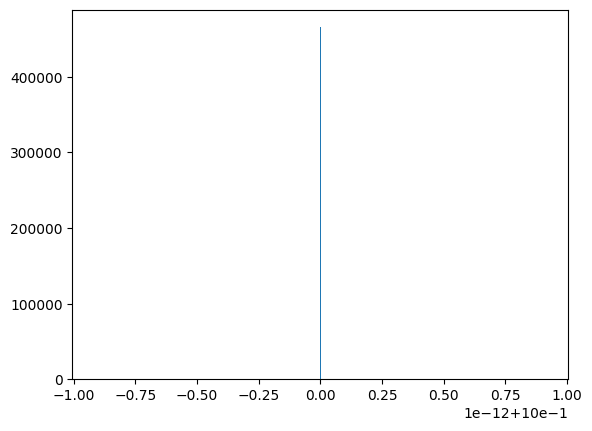

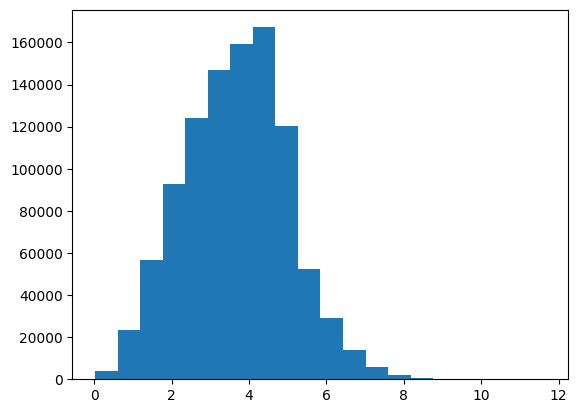

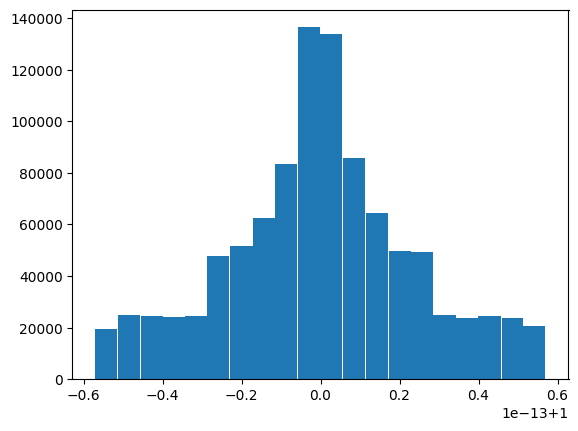

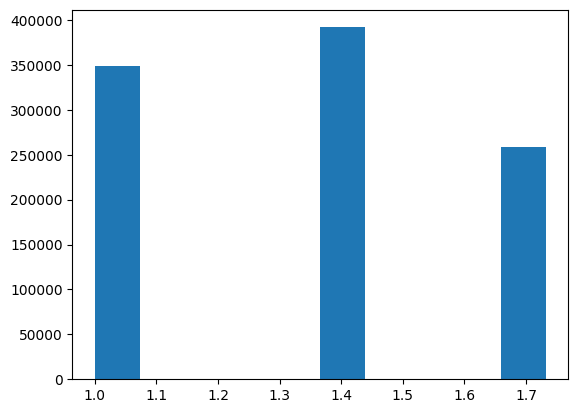

In [16]:
plt.hist(FJC_BondLength)

plt.savefig("hisat_1.png")
plt.show()

plt.hist(SAW_BondLength)
plt.savefig("hisat_2.png")
plt.show()

plt.hist(MDC_BondLength,bins =20)

plt.savefig("hisat_3.png")
plt.show()

plt.hist(BROWNIAN_BondLength,bins =20)

plt.savefig("hisat_4.png")
plt.show()

plt.hist(GAUSSIAN_BondLength,bins =20)

plt.savefig("hisat_5.png")
plt.show()

plt.hist(RIS_BondLength)

plt.savefig("hisat_6.png")
plt.show()


plt.hist(FRC_BondLength)

plt.savefig("hisat_7.png")
plt.show()


plt.hist(KLM_BondLength)

plt.savefig("hisat_8.png")
plt.show()

plt.hist(REPTATION_BondLength,bins =20)

plt.savefig("hisat_9.png")
plt.show()

plt.hist(WLC_BondLength,bins =20)

plt.savefig("hisat_10.png")
plt.show()

plt.hist(EVC_BondLength)

plt.savefig("hisat_11.png")
plt.show()

In [2]:
def animate(positions, name):

    images = []
    for i in range(1,positions.shape[0]):
        print(i)
        plt.clf()
        # plt.title("Animating md Model for steps={0} size={1} , T={2} , delta={3}".format(steps,self.length,T,delta))
        # plt.scatter(trajectory[i*jump,:].real,trajectory[i*jump,:].imag,c="blue",s=1)

        ax = plt.figure().add_subplot(projection='3d')
        ax.plot(xs = positions[:i,0],ys = positions[:i,1] , zs=positions[:i,2])
        ax.scatter(xs = positions[:i,0],ys = positions[:i,1] , zs=positions[:i,2],c="red",s=12)


        # plt.xlim((0,self.length))
        # plt.ylim((0,self.length))
        # plt.xlabel("X")
        # plt.ylabel("Y")

        # ax.set_xlim(-30,30)
        # ax.set_ylim(-30,30)
        # ax.set_zlim(-30,30)
        
        plt.savefig(str(i)+".png")

        plt.close()
        
        images.append(imageio.imread(str(i)+".png"))

    imageio.mimsave('{}.mp4'.format(name), images)
    Video('{}.mp4'.format(name))

NameError: name 'positions' is not defined

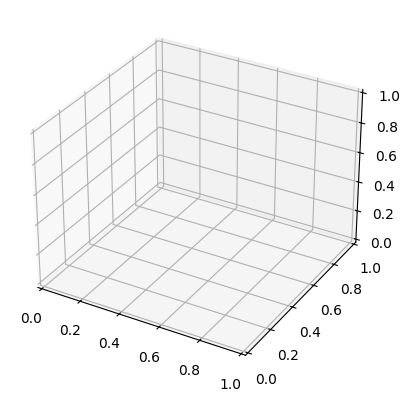

In [2]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs = positions[:,0],ys = positions[:,1] , zs=positions[:,2])

In [4]:
positions = FJC()

In [4]:
positions.shape

(1000, 3)

In [19]:
animate(positions[:100],"test")

1
2


C:\Users\MSI gf65\AppData\Local\Temp\ipykernel_13096\4184216402.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(str(i)+".png"))


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


<Figure size 640x480 with 0 Axes>

In [6]:
models_name

['FJC',
 'SAW',
 'MDC',
 'BROWNIAN',
 'GAUSSIAN',
 'RIS',
 'FRC',
 'KLM',
 'REPTATION',
 'WLC',
 'EVC']

In [7]:
for i in range(5,len(models)):
    print(models_name[i])
    animate(models[i](1_000),models_name[i])

RIS
1
2
3


C:\Users\MSI gf65\AppData\Local\Temp\ipykernel_21508\4184216402.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(str(i)+".png"))


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
27

C:\Users\MSI gf65\AppData\Local\Temp\ipykernel_21508\4184216402.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(str(i)+".png"))



5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279

C:\Users\MSI gf65\AppData\Local\Temp\ipykernel_21508\4184216402.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(str(i)+".png"))


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
27

In [ ]:
def getData(function,STEPS = 10_000,iterations = 1):
    
        positions = function(STEPS)

        endToEnds = np.linalg.norm(positions - positions[0],axis=1)
        RGs = np.zeros(STEPS)
        for j in range(1,STEPS):
            RGs[j] = cal_radius_of_gyration(positions[:j])
        BLs = cal_bond_lengths(positions)

        endToEndData[i] = endToEnds
        RGsData[i] = RGs
        BLsData = np.concatenate([BLsData,BLs])

    return np.mean(endToEndData,axis=0),np.mean(RGsData,axis=0),BLsData



In [6]:
animate(BFC(1_000),"BFC")

1
2


C:\Users\MSI gf65\AppData\Local\Temp\ipykernel_23496\4184216402.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(str(i)+".png"))


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278


<Figure size 640x480 with 0 Axes>

In [7]:
animate(MCL(1_000),"MCL")

1
2


C:\Users\MSI gf65\AppData\Local\Temp\ipykernel_23496\4184216402.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(str(i)+".png"))


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278


<Figure size 640x480 with 0 Axes>

In [6]:
animate(EVC(1_000),"EVC")

1


C:\Users\MSI gf65\AppData\Local\Temp\ipykernel_8052\4184216402.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(str(i)+".png"))


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

<Figure size 640x480 with 0 Axes>

In [6]:
animate(REPTATION(1_000),"REPTATION")

1
2


C:\Users\MSI gf65\AppData\Local\Temp\ipykernel_15712\4184216402.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(str(i)+".png"))


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278


<Figure size 640x480 with 0 Axes>